# 의사결정나무

이정재  
2024-03-24

## 의사결정나무

-   **[유튜브 김성범 교수님
    강의](https://www.youtube.com/@user-yu5qs4ct2b) , [전북대학교 최규빈
    교수님 강의노트](https://guebin.github.io/MP2023/)로 학습한 것을
    토대로 작성하였습니다.**

`-` 파이썬 코드로 간단한 예시를 들어보겠습니다.

In [12]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
import IPython
import sklearn.tree
#---#
import warnings
warnings.filterwarnings('ignore')

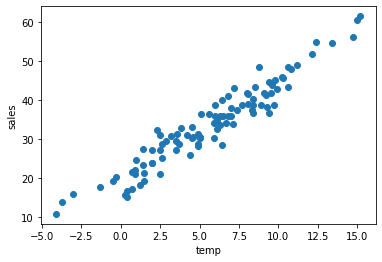

In [15]:
# visualization
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
X = df_train[['temp']]
y = df_train['sales']
plt.plot(X,y,'o')
plt.xlabel('temp')
plt.ylabel('sales')
plt.show()

-   그림과 같이 온도에 따른 아이스크림 판매량의 그래프가 있습니다.
-   여기서 특정 온도에 대한 아이스크림 판매량을 의사결정나무로
    예측해보겠습니다.

In [26]:
pdtr = sklearn.tree.DecisionTreeRegressor(max_depth=1)
pdtr.fit(X,y)

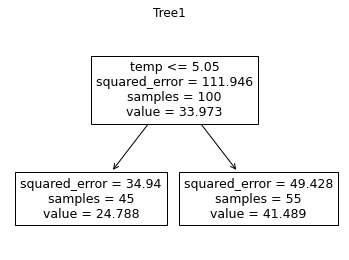

In [43]:
sklearn.tree.plot_tree(
    pdtr,
    feature_names=X.columns
                      );
fig1 = plt.gcf()
fig1.suptitle("Tree1")

-   그림과 같이 변수 `temp`를 특정 기준(5.05)으로 나누어서 분류해줍니다.
-   지금은 최대깊이가(`max_depth`) 1로 지정한 트리입니다.
-   최대깊이(`max_depth`)를 늘린 트리는 다음과 같습니다.

In [30]:
pdtr2 = sklearn.tree.DecisionTreeRegressor(max_depth=3)
pdtr2.fit(X,y)

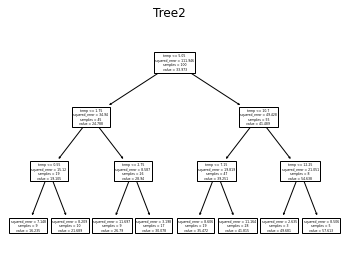

In [44]:
sklearn.tree.plot_tree(
    pdtr2,
    max_depth=3,
    feature_names=X.columns
                      );
fig2 = plt.gcf()
fig2.suptitle("Tree2")

-   이처럼 의사결정나무는 특정 변수에 대해 기준을 나누어 가지를
    뻗어나가는 메커니즘입니다.
-   나무를 뒤짚어놓은 모양처럼 생겨서 의사결정나무라고 불립니다.
-   각각의 박스들을 노드라고 부릅니다.
-   맨 위의 노드를 뿌리노드(Root node), 맨 아리의 노드를 끝노드(Terminal
    node)라고 부릅니다.

`-` **`Tree1`의 좌표평면에 대한 시각화는 다음과 같습니다.**

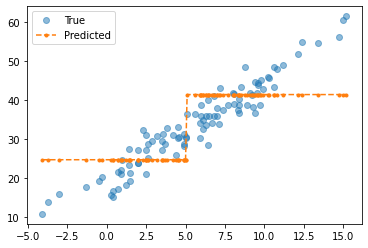

In [45]:
plt.plot(X,y,'o',alpha=0.5,label='True')
plt.plot(X,pdtr.predict(X),'--.',label='Predicted')
plt.legend()

`-` **`Tree2`의 좌표평면에 대한 시각화는 다음과 같습니다.**

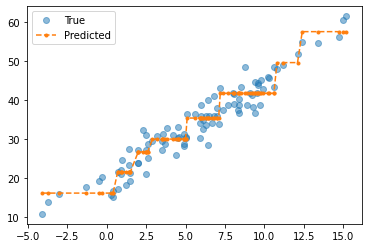

In [46]:
plt.plot(X,y,'o',alpha=0.5,label='True')
plt.plot(X,pdtr2.predict(X),'.--',label='Predicted')
plt.legend()

-   `Tree1`에 비해서 `Tree2`가 더 잘맞출 것 같습니다.
-   하지만 `max depth`가 너무 많이 커진다면 과적합(Overfittig)의 위험이
    생깁니다.
-   `max depth`에 따른 좌포평면 시각화 애니메이션은 다음과 같습니다.

### 시각화(애니메이션)

In [53]:
## step1 
X = df_train[['temp']]
y = df_train['sales']
## step2
predictrs = [sklearn.tree.DecisionTreeRegressor(max_depth=k) for k in range(1,11)]
## step3 
for k in range(10):
    predictrs[k].fit(X,y)
## step4 -- pass
fig = plt.figure()

In [50]:
def func(frame):
    ax = fig.gca()
    ax.clear()
    ax.plot(X,y,'o',alpha=0.5) 
    ax.plot(X,predictrs[frame].predict(X),'.--') 
    ax.set_title(f'max_depth={predictrs[frame].max_depth}')

In [51]:
ani = matplotlib.animation.FuncAnimation(
    fig,
    func,
    frames=10
)

In [52]:
display(IPython.display.HTML(ani.to_jshtml()))

`-` 시각화처럼 `max depth`가 너무 커지면 과적합(Overfitting)의 위험이
증가합니다.

### 원리

(추후 업로드 예정)